#  Sentiment Analysis- US Airline 

In [1]:
pip install pandas matplotlib tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5

#### DATA PREPROCESSING

In [2]:
import pandas as pd

df = pd.read_csv("C:/Users/dhris/OneDrive/Desktop/Projects/Airline Sentiment/Tweets.csv")

In [3]:
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
#Extracting only text and sentiment column

review_df = df[['text','airline_sentiment']]

print(review_df.shape)
review_df.head(5)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [5]:
#Checking column names
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [6]:
#Dropping Neutral reviews

review_df = review_df[review_df['airline_sentiment'] != 'neutral']

print(review_df.shape)
review_df.head(5)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive


In [7]:
#Check the values of the 'airline_sentiment' column

review_df["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [8]:
#convert the categorical values to numeric using the factorize() method
# 0 - Positive sentiment; 1- Negative sentiment

sentiment_label = review_df.airline_sentiment.factorize()
sentiment_label

(array([0, 1, 1, ..., 0, 1, 1], dtype=int64),
 Index(['positive', 'negative'], dtype='object'))

In [9]:
#Convert the text into an array of vector embeddings
#Give each of the unique words a unique number and then replace that word with the number assigned.

tweet = review_df.text.values

In [15]:
#Tokenization: break down all the words/sentences of a text into small parts

from tensorflow.keras.preprocessing.text import Tokenizer

In [17]:
tokenizer = Tokenizer(num_words=5000)

#fit_on_texts() method creates an association between the words and the assigned numbers
tokenizer.fit_on_texts(tweet)

In [18]:
#extract the vocabulary size using 'tokenizer.word_index'

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 for the reserved 0 index

In [19]:
# Calculate vocabulary size

vocab_size = len(tokenizer.word_index) + 1 

In [20]:
#Replacing the words with their assigned numbers using the text_to_sequence() method

encoded_docs = tokenizer.texts_to_sequences(tweet)


In [21]:
#Padding to pad the sentences to have equal length

from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequence = pad_sequences(encoded_docs, maxlen=200)

#### TEXT CLASSIFIER

###### LSTM layers is used in the project . The architecture of the model consists of an embedding layer, an LSTM layer, and a Dense layer at the end. To avoid overfitting, Dropout mechanism is introduced in-between the LSTM layers.

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding


embedding_vector_length = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440139 (1.68 MB)
Trainable params: 440139 (1.68 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

#### TRAINING THE MODEL

In [23]:
#Training the model for 5 epochs on the whole dataset with a batch size of 32 and a validation split of 20%.

history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5


289/289 [==============================] - 91s 283ms/step - loss: 0.3836 - accuracy: 0.8371 - val_loss: 0.2008 - val_accuracy: 0.9225
Epoch 2/5
289/289 [==============================] - 77s 266ms/step - loss: 0.2180 - accuracy: 0.9144 - val_loss: 0.1630 - val_accuracy: 0.9411
Epoch 3/5
289/289 [==============================] - 78s 271ms/step - loss: 0.1605 - accuracy: 0.9393 - val_loss: 0.1674 - val_accuracy: 0.9420
Epoch 4/5
289/289 [==============================] - 76s 264ms/step - loss: 0.1376 - accuracy: 0.9497 - val_loss: 0.1642 - val_accuracy: 0.9441
Epoch 5/5
289/289 [==============================] - 79s 273ms/step - loss: 0.1088 - accuracy: 0.9600 - val_loss: 0.1906 - val_accuracy: 0.9459


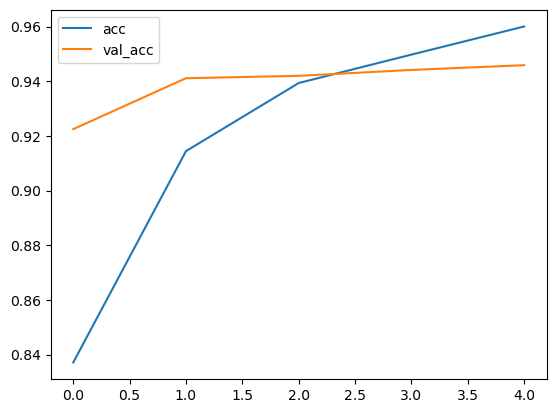

<Figure size 640x480 with 0 Axes>

In [24]:
#Plotting the metrics using the matplotlib

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")


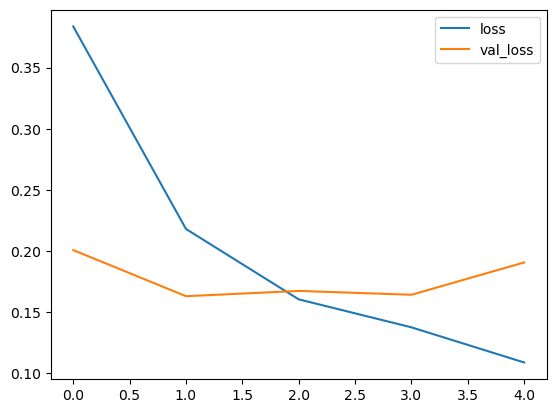

<Figure size 640x480 with 0 Axes>

In [25]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

#### EXECUTING THE SENTIMENT ANALYSIS MODEL

In [26]:
#Defining a function that takes a text as input and outputs its prediction label

def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", sentiment_label[1][prediction])

In [27]:
test_sentence1 = "I enjoyed my journey on this flight."
predict_sentiment(test_sentence1)

test_sentence2 = "This is the worst flight experience of my life!"
predict_sentiment(test_sentence2)


1/1 [==============================] - 1s 1s/step
Predicted label:  positive
1/1 [==============================] - 0s 90ms/step
Predicted label:  negative
